## Лабораторная работа по курсу \"Искусственный интеллект\"
## Многослойный персептрон
###  Собственная реализация

| Студент | Коростелев Дмитрий |
|---------|--------|
| Группа  | М8О-308Б-18      |

## Настройка среды

Устанавливаем все необходимый библиотеки: pandas, numpy, os, pickle

In [1]:
%pip install pandas
import pickle
import os
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Подготовка датасетов
Объявим некоторые функции для анализа датасетов

In [2]:
def count_of_keys(df):
    unique = np.unique(df)
    counts = np.zeros(len(unique), dtype=np.int32)
    for v in df:
        counts[v] += 1
    return counts
def visualization_of_counts(df):
    counts = count_of_keys(df)
    plt.ylabel("Кол-во элементов в классе")
    plt.xlabel("Номер каждого класса")
    plt.bar(np.arange(len(counts)), counts)
    plt.xticks(np.arange(len(counts)), [i for i in range(len(counts))])
def analyze(labels, features, string :str):
    visualization_of_counts(labels)
    print("Данные для [{}]".format(string))
    print("Количество элементов в датасете : {}".format(len(labels)))
    print("Количество атрибутов в элементе : {}".format(len(features[0])))
    print("Минимальное значение атрибута   : {}".format(np.min(features)))
    print("Максимальное значение атрибута  : {}".format(np.max(features)))
    print()

### MNIST

Датасет содержит черно-белые картинки, на которых изображены цифры. 

In [3]:
with open('mnist.pkl', 'rb') as mnist_pickle:
    MNIST = pickle.load(mnist_pickle)
print(MNIST.keys())

dict_keys(['Train'])


In [4]:
print(MNIST['Train'].keys())

dict_keys(['Labels', 'Features'])


Данные для [MNIST]
Количество элементов в датасете : 42000
Количество атрибутов в элементе : 784
Минимальное значение атрибута   : 0
Максимальное значение атрибута  : 255

Данные для [Обучающая выборка из MNIST]
Количество элементов в датасете : 33600
Количество атрибутов в элементе : 784
Минимальное значение атрибута   : 0.0
Максимальное значение атрибута  : 1.0

Данные для [Тестировочная выборка из MNIST]
Количество элементов в датасете : 8400
Количество атрибутов в элементе : 784
Минимальное значение атрибута   : 0.0
Максимальное значение атрибута  : 1.0



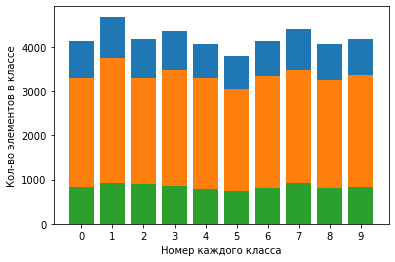

In [5]:
def conv_df(df):
    return np.array(df).astype(np.float32)/255

analyze(MNIST['Train']['Labels'], MNIST['Train']['Features'], "MNIST")

features = conv_df(MNIST['Train']['Features'])
labels = MNIST['Train']['Labels']

mnist_train_x, mnist_test_x, mnist_train_y, mnist_test_y = train_test_split(features,labels,test_size=0.2)

analyze(mnist_train_y, mnist_train_x, "Обучающая выборка из MNIST")
analyze(mnist_test_y, mnist_test_x, "Тестировочная выборка из MNIST")

Подготовили датасет для тестирования, приведем его основные размеры

In [6]:
print("Размер обучающей выборки : {}".format(len(mnist_train_x)))
print("Размер тестовой выборки  : {}".format(len(mnist_test_x)))
print("Размер датасета MNIST    : {}".format(len(features)))

Размер обучающей выборки : 33600
Размер тестовой выборки  : 8400
Размер датасета MNIST    : 42000


### FashionMNIST

In [7]:
%cd fashion-mnist/utils
import mnist_reader
%cd ..
fashion_mnist_train_x_raw, fashion_mnist_train_y = mnist_reader.load_mnist('data/fashion', kind='train')
fashion_mnist_test_x_raw, fashion_mnist_test_y = mnist_reader.load_mnist('data/fashion', kind='t10k')
%cd ..

C:\Users\Admin\fashion-mnist\utils
C:\Users\Admin\fashion-mnist
C:\Users\Admin


Данные для [Обучающая выборка из Fashion MNIST]
Количество элементов в датасете : 60000
Количество атрибутов в элементе : 784
Минимальное значение атрибута   : 0
Максимальное значение атрибута  : 255

Данные для [Тестировочная выборка из Fashion MNIST]
Количество элементов в датасете : 10000
Количество атрибутов в элементе : 784
Минимальное значение атрибута   : 0
Максимальное значение атрибута  : 255



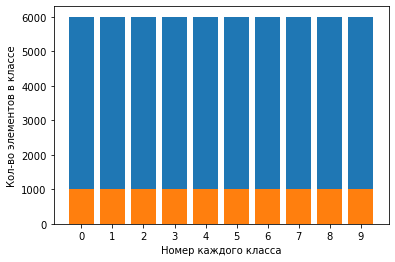

In [8]:
analyze(fashion_mnist_train_y, fashion_mnist_train_x_raw, "Обучающая выборка из Fashion MNIST")
analyze(fashion_mnist_test_y, fashion_mnist_test_x_raw, "Тестировочная выборка из Fashion MNIST")

Так как каждое значение картинки имеет значение от 0 до 255, переведем данные значения в числа с плавающей точкой от 0 до 1.

In [9]:
fashion_mnist_train_x = conv_df(fashion_mnist_train_x_raw)
fashion_mnist_test_x  = conv_df(fashion_mnist_test_x_raw)

In [10]:
print(fashion_mnist_train_x[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00392157 0.         0.         0.05098039 0.28627452 

In [11]:
print("Размерр датасета Fashion MNIST : {}".format(len(fashion_mnist_test_x) + len(fashion_mnist_train_x)))

Размерр датасета Fashion MNIST : 70000


## Нейронная сеть (Перцептрон)

### Основные компоненты сети

Так как нейронную сеть можно представить в виде последовательности объектов, которые осуществляют взаимодействие межу собой, будем формировать нейросеть из объектов с методами forward и backward. Методы forward будут использоваться для получения результатов от нейросети, т.е. будет осуществляться прямая прогонка, а методы backward - для осуществления обратного прохода, который будет использоваться для обучения сети.

Базовую нейросеть можно представить в виде последовательности классов, приведенных ниже

In [12]:
class Softmax:
    def forward(self,z):
        self.z = z
        zmax = z.max(axis=1,keepdims=True)
        expz = np.exp(z-zmax)
        Z = expz.sum(axis=1,keepdims=True)
        return expz / Z
    def backward(self,dp):
        p = self.forward(self.z)
        pdp = p * dp
        return pdp - p * pdp.sum(axis=1, keepdims=True)
    
class CrossEntropyLoss:
    def forward(self,p,y):
        self.p = p
        self.y = y
        p_of_y = p[np.arange(len(y)), y]
        log_prob = np.log(p_of_y)
        return -log_prob.mean()
    def backward(self,loss):
        dlog_softmax = np.zeros_like(self.p)
        dlog_softmax[np.arange(len(self.y)), self.y] -= 1.0/len(self.y)
        return dlog_softmax / self.p
    
class Linear:
    def __init__(self,nin,nout):
        self.W = np.random.normal(0, 1.0/np.sqrt(nin), (nout, nin))
        self.b = np.zeros((1,nout))
        self.dW = np.zeros_like(self.W)
        self.db = np.zeros_like(self.b)
        
    def forward(self, x):
        self.x=x
        return np.dot(x, self.W.T) + self.b
    
    def backward(self, dz):
        dx = np.dot(dz, self.W)
        dW = np.dot(dz.T, self.x)
        db = dz.sum(axis=0)
        self.dW = dW
        self.db = db
        return dx
    
    def update(self,lr):
        self.W -= lr*self.dW
        self.b -= lr*self.db

class Net:
    def __init__(self):
        self.layers = []
    
    def add(self,l):
        self.layers.append(l)
        
    def forward(self,x):
        for l in self.layers:
            x = l.forward(x)
        return x
    
    def backward(self,z):
        for l in self.layers[::-1]:
            z = l.backward(z)
        return z
    
    def update(self,lr):
        for l in self.layers:
            if 'update' in l.__dir__():
                l.update(lr)
                
class Tanh:
    def forward(self,x):
        y = np.tanh(x)
        self.y = y
        return y
    def backward(self,dy):
        return (1.0-self.y**2)*dy
    def copy(self):
        return Tanh()

Реализуем простую обертку над этимb классами, при помощи которой можно будет реализовать многослойный перцептрон, задав всего несколько параметров. Данный класс будет иметь зависимости от класса Net, а саму сеть можно представить следующим образом:

\[Слой нейросети\] <-> \[Функция активации\] <->  ... <-> \[Функция активации\] <-> \[SoftMax\] <-> \[Функция ошибки\] 

### Класс Perceptron

Класс Perceptron имеет множество необязательных аргументов, которые могут быть отрегулированы программистом (Программист может использовать собственные реализации функции активации, функции потерь, функции softmax и функции потерь). Кроме того программист может передать базовый Python список, в котором будут находится широты внутренних слоев нейросети. Таким образом при помощи одного списка задается кол-во скрытых слоев и их конфигурация.

Процесс обучения вынесен в отдельную функцию fit (как в sklearn), кроме того пользователь может просто предоставить данные нейросети и сам класс вычислит количество входных и выходных нейронов.

Таким образом, чтобы создаь нейроосеть при помощи моего фреймворка достаточно задать широты внутренних нейронов и передать данные для обучения нейросети.

In [13]:
class Perceptron:
    def __init__(self, learning_rate=0.1,epochs=10, soft=Softmax(),act_func=Tanh(),
                layers=[5], loss_func=CrossEntropyLoss(),show_status=False):
        self.learning_rate=learning_rate
        self.epochs=epochs
        self.softmax=soft
        self.act_func=act_func
        self.layers=layers
        self.loss_function=loss_func
        self.show_status=show_status
        self.level=0
     
    def status_print(self, msg, level=-1):
        if level == -1:
            level = self.level
        print("  "*level + msg)
    def create_net(self, X, Y):
        self.net = Net()
        #узнаем ширину слоев нейросети
        layers_settings = self.layers.copy()
        layers_settings.insert(0, len(X[0]))
        layers_settings.append(len(np.unique(Y)))
        self.classes_count = layers_settings[-1]
        if self.show_status:
            self.status_print("Создание сети :")
            self.level += 1
            self.status_print("Количество скрытых слоев     : {}".format(len(layers_settings)-2))
            self.status_print("Количество входных нейронов  : {}".format(layers_settings[0]))
            self.status_print("Koличество выходных нейронов : {}".format(layers_settings[-1]))
            self.status_print("Широты скрытых слоев         : {}".format(self.layers))
            self.level -= 1
            
        #конфигурация нейросети слоями
        for i in range(len(layers_settings)-2):
            self.net.add(Linear(layers_settings[i], layers_settings[i+1]))
            self.net.add(self.act_func.copy())
        #добавляем выходной слой и softmax
        self.net.add(Linear(layers_settings[-2], layers_settings[-1]))
        self.net.add(self.softmax)
        return self    
    
    # надо как-то обучить перцептрон
    def fit(self, X,Y):
        #создадим нейросеть
        self.create_net(X,Y)
        #процесс обучения сети
        
        if self.show_status:
            self.level = 0
            self.status_print("Обучение сети:")
            self.level += 1
            
        for epoch in range(1, self.epochs + 1):
            
            
            self.train_epoch(X, Y)
            if self.show_status:
                self.status_print("[Эпоха {} из {}] потеря : {}, точность : {}".format(epoch, self.epochs, *(self.score(X,Y))))
        return self

    def train_epoch(self, train_x, train_y, batch_size=4):
        net = self.net
        loss = self.loss_function
        lr = self.learning_rate
        for i in range(0,len(train_x),batch_size):
            xb = train_x[i:i+batch_size]
            yb = train_y[i:i+batch_size]

            p = net.forward(xb)
            l = loss.forward(p,yb)
            dp = loss.backward(l)
            dx = net.backward(dp)
            net.update(lr)  

    #вычисление вроятнсотей принадлжения каждому возможному классу
    def predict_prob(self, X):
        return self.net.forward(X)
    
    #выдаем наиболее вероятный класс (его номер)
    def predict(self, X):
        return np.argmax(self.predict_prob(X))
    
    def score(self, X,Y, calculate_confusion_matrix=False):
        p = self.net.forward(X)
        l = self.loss_function.forward(p,Y)
        pred = np.argmax(p,axis=1)
        acc = (pred==Y).mean()
        confusion_matrix=[]
        if calculate_confusion_matrix:
            confusion_matrix = np.zeros((self.classes_count, self.classes_count), dtype=np.int32)
            for prd, act in zip (pred, Y):
                confusion_matrix[prd][act] += 1
        return l,acc, confusion_matrix

## Тестирование

### Теститрование на датасете MNIST
Конфигурировать сети будем внутренними слоями с различными широтами.

#### Однослойный перцептрон #### 

In [14]:
null_layered_perceptron = Perceptron(show_status=True, layers=[]).fit(mnist_train_x, mnist_train_y)

Создание сети :
  Количество скрытых слоев     : 0
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : []
Обучение сети:
  [Эпоха 1 из 10] потеря : 0.319479974383089, точность : 0.9089583333333333
  [Эпоха 2 из 10] потеря : 0.3042911454878201, точность : 0.9147321428571429
  [Эпоха 3 из 10] потеря : 0.29623251830574115, точность : 0.9175
  [Эпоха 4 из 10] потеря : 0.29095040370107134, точность : 0.9187202380952381
  [Эпоха 5 из 10] потеря : 0.2869803230650682, точность : 0.9199107142857142
  [Эпоха 6 из 10] потеря : 0.2837731367182898, точность : 0.9209821428571429
  [Эпоха 7 из 10] потеря : 0.28109654932301575, точность : 0.921875
  [Эпоха 8 из 10] потеря : 0.2788263561728799, точность : 0.9228273809523809
  [Эпоха 9 из 10] потеря : 0.27688270042293306, точность : 0.9236607142857143
  [Эпоха 10 из 10] потеря : 0.27520651710346183, точность : 0.9241964285714286


In [15]:
print("Точность сети : {}".format(null_layered_perceptron.score(mnist_test_x, mnist_test_y)[1]))

Точность сети : 0.9054761904761904


#### Двуслойные перцептроны #### 
5 нейроного на скрытом слое

In [16]:
first_one_layered_perceptron = Perceptron(show_status=True).fit(mnist_train_x, mnist_train_y)

Создание сети :
  Количество скрытых слоев     : 1
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [5]
Обучение сети:
  [Эпоха 1 из 10] потеря : 0.6586162250508563, точность : 0.8080059523809524
  [Эпоха 2 из 10] потеря : 0.6014632545341628, точность : 0.8315476190476191
  [Эпоха 3 из 10] потеря : 0.584752231385793, точность : 0.8396428571428571
  [Эпоха 4 из 10] потеря : 0.5678749140827443, точность : 0.8493154761904762
  [Эпоха 5 из 10] потеря : 0.5441136691405655, точность : 0.859375
  [Эпоха 6 из 10] потеря : 0.5320130509843091, точность : 0.8601190476190477
  [Эпоха 7 из 10] потеря : 0.5986235636946835, точность : 0.8324702380952381
  [Эпоха 8 из 10] потеря : 0.5587657839168616, точность : 0.8541964285714285
  [Эпоха 9 из 10] потеря : 0.5719255908992976, точность : 0.8469642857142857
  [Эпоха 10 из 10] потеря : 0.5148828579668975, точность : 0.8679166666666667


In [17]:
print("Точность сети : {}".format(first_one_layered_perceptron.score(mnist_test_x, mnist_test_y)[1]))

Точность сети : 0.849047619047619


10 нейронов на скрытом слое

In [18]:
second_one_layered_perceptron = Perceptron(show_status=True, layers=[10]).fit(mnist_train_x, mnist_train_y)
print("Точность сети : {}".format(second_one_layered_perceptron.score(mnist_test_x, mnist_test_y)[1]))

Создание сети :
  Количество скрытых слоев     : 1
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [10]
Обучение сети:
  [Эпоха 1 из 10] потеря : 0.35707912650089646, точность : 0.8982142857142857
  [Эпоха 2 из 10] потеря : 0.349508211448527, точность : 0.9007738095238095
  [Эпоха 3 из 10] потеря : 0.3133798969514313, точность : 0.9111904761904762
  [Эпоха 4 из 10] потеря : 0.31153766766887336, точность : 0.9116666666666666
  [Эпоха 5 из 10] потеря : 0.3042919706224049, точность : 0.9122619047619047
  [Эпоха 6 из 10] потеря : 0.3013950893700502, точность : 0.9141071428571429
  [Эпоха 7 из 10] потеря : 0.2898752517714442, точность : 0.9173809523809524
  [Эпоха 8 из 10] потеря : 0.2847313689466162, точность : 0.9193154761904762
  [Эпоха 9 из 10] потеря : 0.27955797986302805, точность : 0.9206845238095238
  [Эпоха 10 из 10] потеря : 0.29322099651193634, точность : 0.9166369047619047
Точность сети : 0.8948809523809523


25 нейронов на скрытом слое

In [19]:
third_one_layered_perceptron = Perceptron(show_status=True, layers=[25]).fit(mnist_train_x, mnist_train_y)
print("Точность сети : {}".format(third_one_layered_perceptron.score(mnist_test_x, mnist_test_y)[1]))

Создание сети :
  Количество скрытых слоев     : 1
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [25]
Обучение сети:
  [Эпоха 1 из 10] потеря : 0.22860881779893266, точность : 0.9348214285714286
  [Эпоха 2 из 10] потеря : 0.2104747866490189, точность : 0.9364583333333333
  [Эпоха 3 из 10] потеря : 0.17722049677510973, точность : 0.9457738095238095
  [Эпоха 4 из 10] потеря : 0.153894314030459, точность : 0.9529464285714285
  [Эпоха 5 из 10] потеря : 0.14873210538221907, точность : 0.9541964285714286
  [Эпоха 6 из 10] потеря : 0.15762579548940264, точность : 0.9518154761904762
  [Эпоха 7 из 10] потеря : 0.1526360682065499, точность : 0.952827380952381
  [Эпоха 8 из 10] потеря : 0.13872999491104934, точность : 0.9576488095238095
  [Эпоха 9 из 10] потеря : 0.12393310706691696, точность : 0.9611904761904762
  [Эпоха 10 из 10] потеря : 0.13145225405415975, точность : 0.9594940476190477
Точность сети : 0.9361904761904762


100 нейронов на скрытом слое

In [20]:
fourth_one_layered_perceptron = Perceptron(show_status=True, layers=[100]).fit(mnist_train_x, mnist_train_y)
print("Точность сети : {}".format(fourth_one_layered_perceptron.score(mnist_test_x, mnist_test_y)[1]))

Создание сети :
  Количество скрытых слоев     : 1
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [100]
Обучение сети:
  [Эпоха 1 из 10] потеря : 0.14750478269873374, точность : 0.9558630952380952
  [Эпоха 2 из 10] потеря : 0.0956983418678201, точность : 0.9700892857142858
  [Эпоха 3 из 10] потеря : 0.07116031588462239, точность : 0.9775297619047619
  [Эпоха 4 из 10] потеря : 0.05782178206373234, точность : 0.9809821428571428
  [Эпоха 5 из 10] потеря : 0.04459625402055623, точность : 0.9859821428571428
  [Эпоха 6 из 10] потеря : 0.04942419968848505, точность : 0.9832738095238095
  [Эпоха 7 из 10] потеря : 0.043867345515817835, точность : 0.9848809523809524
  [Эпоха 8 из 10] потеря : 0.031246381310818087, точность : 0.9892261904761904
  [Эпоха 9 из 10] потеря : 0.022642490197139063, точность : 0.9922619047619048
  [Эпоха 10 из 10] потеря : 0.016395042574862188, точность : 0.9943154761904762
Точность сети : 0.9667857142857142


#### Трехслойные перцептроны #### 

Внутренние слои шириной 4 и 15

In [21]:
first_double_layered_perceptron = Perceptron(show_status=True, layers=[4,15]).fit(mnist_train_x, mnist_train_y)
print("Точность сети : {}".format(first_double_layered_perceptron.score(mnist_test_x, mnist_test_y)[1]))

Создание сети :
  Количество скрытых слоев     : 2
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [4, 15]
Обучение сети:
  [Эпоха 1 из 10] потеря : 0.6967336596766792, точность : 0.8121130952380953
  [Эпоха 2 из 10] потеря : 0.6811621183955324, точность : 0.8205357142857143
  [Эпоха 3 из 10] потеря : 0.6750144804118615, точность : 0.8219940476190476
  [Эпоха 4 из 10] потеря : 0.6639685626999392, точность : 0.8260119047619048
  [Эпоха 5 из 10] потеря : 0.652677415309713, точность : 0.8323214285714285
  [Эпоха 6 из 10] потеря : 0.6520934557922721, точность : 0.8297619047619048
  [Эпоха 7 из 10] потеря : 0.6708253455543651, точность : 0.8227083333333334
  [Эпоха 8 из 10] потеря : 0.6250523718320796, точность : 0.8395238095238096
  [Эпоха 9 из 10] потеря : 0.6152876494260037, точность : 0.8407738095238095
  [Эпоха 10 из 10] потеря : 0.6274336750764182, точность : 0.8411309523809524
Точность сети : 0.8275


Внутренние слои шириной 7 и 10

In [22]:
second_double_layered_perceptron = Perceptron(show_status=True, layers=[7,10]).fit(mnist_train_x, mnist_train_y)
print("Точность сети : {}".format(second_double_layered_perceptron.score(mnist_test_x, mnist_test_y)[1]))

Создание сети :
  Количество скрытых слоев     : 2
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [7, 10]
Обучение сети:
  [Эпоха 1 из 10] потеря : 0.5388771313699918, точность : 0.8300892857142858
  [Эпоха 2 из 10] потеря : 0.45022881117296804, точность : 0.872202380952381
  [Эпоха 3 из 10] потеря : 0.45982501360685457, точность : 0.8713095238095238
  [Эпоха 4 из 10] потеря : 0.41620291002874155, точность : 0.8837797619047619
  [Эпоха 5 из 10] потеря : 0.4312662263079598, точность : 0.8676785714285714
  [Эпоха 6 из 10] потеря : 0.40521336565138244, точность : 0.8898511904761904
  [Эпоха 7 из 10] потеря : 0.4146174993164491, точность : 0.8816369047619048
  [Эпоха 8 из 10] потеря : 0.405972399740396, точность : 0.8903869047619047
  [Эпоха 9 из 10] потеря : 0.4347128063246713, точность : 0.8814285714285715
  [Эпоха 10 из 10] потеря : 0.41713630634027743, точность : 0.8807738095238096
Точность сети : 0.8604761904761905


Внутренние слои шириной 15 и 10

In [23]:
third_double_layered_perceptron = Perceptron(show_status=True, layers=[20,10]).fit(mnist_train_x, mnist_train_y)
print("Точность сети : {}".format(third_double_layered_perceptron.score(mnist_test_x, mnist_test_y)[1]))

Создание сети :
  Количество скрытых слоев     : 2
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [20, 10]
Обучение сети:
  [Эпоха 1 из 10] потеря : 0.34126139436368635, точность : 0.8996428571428572
  [Эпоха 2 из 10] потеря : 0.3238584724859709, точность : 0.9050595238095238
  [Эпоха 3 из 10] потеря : 0.28187696836187376, точность : 0.9186904761904762
  [Эпоха 4 из 10] потеря : 0.2709555253638228, точность : 0.9252976190476191
  [Эпоха 5 из 10] потеря : 0.2672313918834173, точность : 0.9256547619047619
  [Эпоха 6 из 10] потеря : 0.23650306283704914, точность : 0.9353571428571429
  [Эпоха 7 из 10] потеря : 0.24009025599961725, точность : 0.9338095238095238
  [Эпоха 8 из 10] потеря : 0.24925340828697395, точность : 0.9279761904761905
  [Эпоха 9 из 10] потеря : 0.26720374408632985, точность : 0.925
  [Эпоха 10 из 10] потеря : 0.2425145963678211, точность : 0.9324404761904762
Точность сети : 0.9148809523809524


#### Другие многослойные перцептроны

Внутренние слои шириной 15, 7, 12

In [24]:
first_multi_layered_perceptron = Perceptron(show_status=True, layers=[15, 7, 12]).fit(mnist_train_x, mnist_train_y)
print("Точность сети : {}".format(first_multi_layered_perceptron.score(mnist_test_x, mnist_test_y)[1]))

Создание сети :
  Количество скрытых слоев     : 3
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [15, 7, 12]
Обучение сети:
  [Эпоха 1 из 10] потеря : 0.48610559188314917, точность : 0.8619940476190476
  [Эпоха 2 из 10] потеря : 0.39877291437832013, точность : 0.8928571428571429
  [Эпоха 3 из 10] потеря : 0.355843261866543, точность : 0.9042559523809524
  [Эпоха 4 из 10] потеря : 0.37427204075121917, точность : 0.9005059523809524
  [Эпоха 5 из 10] потеря : 0.33711125556531596, точность : 0.9077678571428571
  [Эпоха 6 из 10] потеря : 0.3903372727059812, точность : 0.8963988095238096
  [Эпоха 7 из 10] потеря : 0.44106804077721745, точность : 0.8841666666666667
  [Эпоха 8 из 10] потеря : 0.36666903493135555, точность : 0.9011309523809524
  [Эпоха 9 из 10] потеря : 0.38702725411769384, точность : 0.8910119047619047
  [Эпоха 10 из 10] потеря : 0.33820941756679845, точность : 0.910625
Точность сети : 0.901547619047619


Внутренние слои шириной 4, 7, 5, 7

In [25]:
second_multi_layered_perceptron = Perceptron(show_status=True, layers=[4, 7, 5, 7]).fit(mnist_train_x, mnist_train_y)
print("Точность сети : {}".format(second_multi_layered_perceptron.score(mnist_test_x, mnist_test_y)[1]))

Создание сети :
  Количество скрытых слоев     : 4
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [4, 7, 5, 7]
Обучение сети:
  [Эпоха 1 из 10] потеря : 0.9035825793933476, точность : 0.7234821428571429
  [Эпоха 2 из 10] потеря : 0.8314008642343923, точность : 0.7313095238095239
  [Эпоха 3 из 10] потеря : 0.8377835343297098, точность : 0.7342261904761904
  [Эпоха 4 из 10] потеря : 0.8721582250552433, точность : 0.7241964285714285
  [Эпоха 5 из 10] потеря : 0.8541375212913855, точность : 0.7157142857142857
  [Эпоха 6 из 10] потеря : 0.7969023127076611, точность : 0.7330952380952381
  [Эпоха 7 из 10] потеря : 0.8491286613329969, точность : 0.7367261904761905
  [Эпоха 8 из 10] потеря : 0.7267201268979062, точность : 0.7614880952380952
  [Эпоха 9 из 10] потеря : 1.0376385107192068, точность : 0.6879166666666666
  [Эпоха 10 из 10] потеря : 0.761602215024206, точность : 0.7503273809523809
Точность сети : 0.7479761904761905


Внутренние слои шириной 3, 5, 4, 7, 2, 5, 1, 2, 3

In [26]:
third_multi_layered_perceptron = Perceptron(show_status=True, layers=[3, 5, 4, 7, 2, 5, 1, 2, 3]).fit(mnist_train_x, mnist_train_y)
print("Точность сети : {}".format(third_multi_layered_perceptron.score(mnist_test_x, mnist_test_y)[1]))

Создание сети :
  Количество скрытых слоев     : 9
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [3, 5, 4, 7, 2, 5, 1, 2, 3]
Обучение сети:
  [Эпоха 1 из 10] потеря : 1.8050421035472952, точность : 0.27145833333333336
  [Эпоха 2 из 10] потеря : 2.107743110811447, точность : 0.18401785714285715
  [Эпоха 3 из 10] потеря : 1.9708242878083977, точность : 0.19038690476190476
  [Эпоха 4 из 10] потеря : 2.0014279375989217, точность : 0.18038690476190475
  [Эпоха 5 из 10] потеря : 1.925474336430043, точность : 0.19392857142857142
  [Эпоха 6 из 10] потеря : 1.979678143681948, точность : 0.18538690476190475
  [Эпоха 7 из 10] потеря : 2.3053627163651265, точность : 0.1037797619047619
  [Эпоха 8 из 10] потеря : 2.303848052889629, точность : 0.11175595238095239
  [Эпоха 9 из 10] потеря : 2.303802000512549, точность : 0.11175595238095239
  [Эпоха 10 из 10] потеря : 2.303799771914875, точность : 0.11175595238095239
Точность сети : 0.11059523

 Как видно из результатов тестирования подобранные гиперпараметры сети слегка не подходят для решения данной задачи. 

### Тестирование на датасете FashionMnist
#### Однослойный перцептрон

In [27]:
fmnist_null_perceptron = Perceptron(show_status=True, layers=[]).fit(fashion_mnist_train_x, fashion_mnist_train_y)
print("Точность сети : {}".format(fmnist_null_perceptron.score(fashion_mnist_test_x, fashion_mnist_test_y)[1]))

Создание сети :
  Количество скрытых слоев     : 0
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : []
Обучение сети:
  [Эпоха 1 из 10] потеря : 0.9483936903558464, точность : 0.7938166666666666
  [Эпоха 2 из 10] потеря : 0.918982960563827, точность : 0.8043666666666667
  [Эпоха 3 из 10] потеря : 0.8888207846782251, точность : 0.8104666666666667
  [Эпоха 4 из 10] потеря : 0.8972912522925849, точность : 0.8105
  [Эпоха 5 из 10] потеря : 0.872119024267329, точность : 0.8145
  [Эпоха 6 из 10] потеря : 0.8201024493883364, точность : 0.8213666666666667
  [Эпоха 7 из 10] потеря : 0.7875160564451072, точность : 0.8264833333333333
  [Эпоха 8 из 10] потеря : 0.7517527886237838, точность : 0.8324166666666667
  [Эпоха 9 из 10] потеря : 0.723948204288474, точность : 0.83695
  [Эпоха 10 из 10] потеря : 0.7579090488461245, точность : 0.83245
Точность сети : 0.806


#### Двуслойный перцептрон

In [28]:
fmnist_first_perceptron = Perceptron(show_status=True, layers=[13], learning_rate=0.01).fit(fashion_mnist_train_x, fashion_mnist_train_y)
print("Точность сети : {}".format(fmnist_first_perceptron.score(fashion_mnist_test_x, fashion_mnist_test_y)[1]))

Создание сети :
  Количество скрытых слоев     : 1
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [13]
Обучение сети:
  [Эпоха 1 из 10] потеря : 0.44534911229084434, точность : 0.8438833333333333
  [Эпоха 2 из 10] потеря : 0.41051604268113323, точность : 0.8537666666666667
  [Эпоха 3 из 10] потеря : 0.39975786100418986, точность : 0.8561333333333333
  [Эпоха 4 из 10] потеря : 0.3901532984236358, точность : 0.8588
  [Эпоха 5 из 10] потеря : 0.37973571181141413, точность : 0.8610166666666667
  [Эпоха 6 из 10] потеря : 0.3746124976470941, точность : 0.8622
  [Эпоха 7 из 10] потеря : 0.3705180560913325, точность : 0.8633833333333333
  [Эпоха 8 из 10] потеря : 0.36688442016722816, точность : 0.8641166666666666
  [Эпоха 9 из 10] потеря : 0.3635266609263286, точность : 0.8648
  [Эпоха 10 из 10] потеря : 0.3601737455748185, точность : 0.8658333333333333
Точность сети : 0.8459


#### Трехслойный перцептрон

In [29]:
fmnist_second_perceptron = Perceptron(show_status=True, layers=[10,15], learning_rate=0.001, epochs=20)
fmnist_second_perceptron.fit(fashion_mnist_train_x, fashion_mnist_train_y)
print("Точность сети : {}".format(fmnist_second_perceptron.score(fashion_mnist_test_x, fashion_mnist_test_y)[1]))

Создание сети :
  Количество скрытых слоев     : 2
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [10, 15]
Обучение сети:
  [Эпоха 1 из 20] потеря : 0.7654209118742331, точность : 0.75715
  [Эпоха 2 из 20] потеря : 0.5982031939429121, точность : 0.8069666666666667
  [Эпоха 3 из 20] потеря : 0.5226233516444789, точность : 0.8270333333333333
  [Эпоха 4 из 20] потеря : 0.4819151775895247, точность : 0.83765
  [Эпоха 5 из 20] потеря : 0.45600262823527066, точность : 0.8438166666666667
  [Эпоха 6 из 20] потеря : 0.43756160127993193, точность : 0.84925
  [Эпоха 7 из 20] потеря : 0.42356013773800955, точность : 0.8538333333333333
  [Эпоха 8 из 20] потеря : 0.4125404662017916, точность : 0.8572833333333333
  [Эпоха 9 из 20] потеря : 0.4036132390109173, точность : 0.85955
  [Эпоха 10 из 20] потеря : 0.39620229903038995, точность : 0.8618666666666667
  [Эпоха 11 из 20] потеря : 0.3899357956574829, точность : 0.8639166666666667
  [Эпоха 1

#### Четырехслойный перцептрон

In [30]:
fmnist_third_perceptron = Perceptron(show_status=True, layers=[15, 7, 12], learning_rate=0.001, epochs=20)
fmnist_third_perceptron.fit(fashion_mnist_train_x, fashion_mnist_train_y)
print("Точность сети : {}".format(fmnist_third_perceptron.score(fashion_mnist_test_x, fashion_mnist_test_y)[1]))

Создание сети :
  Количество скрытых слоев     : 3
  Количество входных нейронов  : 784
  Koличество выходных нейронов : 10
  Широты скрытых слоев         : [15, 7, 12]
Обучение сети:
  [Эпоха 1 из 20] потеря : 0.8512029560359838, точность : 0.7724833333333333
  [Эпоха 2 из 20] потеря : 0.5975354248129434, точность : 0.8152
  [Эпоха 3 из 20] потеря : 0.5145293982614031, точность : 0.8320666666666666
  [Эпоха 4 из 20] потеря : 0.4709658292513447, точность : 0.8425
  [Эпоха 5 из 20] потеря : 0.4421389326362213, точность : 0.8498
  [Эпоха 6 из 20] потеря : 0.4206701895429854, точность : 0.8562666666666666
  [Эпоха 7 из 20] потеря : 0.4040926624688899, точность : 0.86185
  [Эпоха 8 из 20] потеря : 0.39106018492346983, точность : 0.8657166666666667
  [Эпоха 9 из 20] потеря : 0.38054498629041034, точность : 0.8687166666666667
  [Эпоха 10 из 20] потеря : 0.3718819030779468, точность : 0.8710333333333333
  [Эпоха 11 из 20] потеря : 0.36463401771927195, точность : 0.8733
  [Эпоха 12 из 20] поте

### Итоги

Приведем таблицы со статистикой тестирования

|№ | Кол-во внутр-х слоев | Широты внутр-х слоев | Точность на тестовой выборке (%) | Кол-во эпох | Коэф. обучения | Датасет | 
|--|:--------------------:|:------------:|:--------------------------------:|:-----------:|:-----------:|:-----------:|
|1| 0 |  | 90.583 | 10 | 0.1 | MNIST |
|2| 1 | 5  | 85.404 | 10 | 0.1  | MNIST |
|3| 1 | 10 |90.285 | 10 | 0.1  | MNIST |
|4| 1 | 100 | 96.631 | 10 | 0.1  | MNIST |
|5| 2 | 4, 15 | 67.619 | 10 | 0.1  | MNIST |
|6| 2 | 7, 10 | 88.464 | 10 | 0.1  | MNIST |
|7| 2 | 20, 10 | 92.738 | 10 | 0.1  | MNIST |
|8| 3 | 15, 7, 12 | 90.440 | 10 | 0.1  | MNIST |
|9| 4 | 4, 7, 5, 7 | 77.035 | 10 | 0.1  | MNIST |
|10| 9 | 3, 5, 4, 7, 2, 5, 1, 2, 3 | 09.452 | 10 | 0.1 | MNIST |
|11| 0 |  | 80.690 | 10 | 0.1 | FashionMNIST |
|12| 1 | 13 | 85.150 | 10 | 0.01 | FashionMNIST |
|13| 2| 10, 15 | 85.370 | 20 | 0.001 | FashionMNIST |
|14| 3| 15, 7, 12 | 85.800 | 20 | 0.001 | FashionMNIST |


_Датасет_ : MNIST

* _Количество входных нейронов_ : 784
* _Количество классов для классификации_ : 10


_Датасет_ : FashionMNIST 

* _Количество входных нейронов_ : 784 
* _Количество классов для классификации_ : 10

Получим confusion matrix для наиболее удачных нейронных сетей.

In [31]:
fourth_one_layered_confusion_matrix = fourth_one_layered_perceptron.score(mnist_test_x, mnist_test_y,calculate_confusion_matrix=True)[2]
print(fourth_one_layered_confusion_matrix)

[[818   0   0   0   3   3   6   1   1   1]
 [  0 915   1   3   0   0   1   6   2   0]
 [  3   0 862  11   1   1   1   7   1   0]
 [  1   2   4 818   1   9   0   1   8   7]
 [  0   3   6   2 767   5   6   6   4  21]
 [  2   0   0   6   0 725   4   0   3   2]
 [  6   1   0   0   5   1 778   0   1   0]
 [  0   3   6  14   0   1   0 885   1  12]
 [  4   3   9   8   3   4   2   3 781  10]
 [  1   2   2   2   3   2   1   8   5 772]]


In [32]:
fmnist_third_perceptron_confusion_matrix = fmnist_third_perceptron.score(fashion_mnist_test_x, fashion_mnist_test_y,calculate_confusion_matrix=True)[2]
print(fmnist_third_perceptron_confusion_matrix)

[[812   3  12  24   1   1 165   0   0   0]
 [  0 962   2  18   2   0   4   0   2   0]
 [ 19   7 778   9 109   0  99   0   2   0]
 [ 56  22  15 891  55   1  50   0   6   0]
 [  4   4 118  28 779   0  90   0   3   0]
 [  1   0   0   0   2 936   1  28   2   8]
 [ 92   0  60  22  41   0 572   0   6   0]
 [  0   0   0   0   0  40   0 956   6  54]
 [ 16   2  15   8  11   4  19   1 973   0]
 [  0   0   0   0   0  18   0  15   0 938]]


## Выводы

В ходе работы удалось реализовать собственный нейросетевой фреймворк, при помощи которого можно с легкостью решать задачи классификации объектов. Для этого достаточно передать несколько параметров в нейросеть и обучить ее при помощи обучающей выборки. Нейросеть обучается методом обучения с учителем и регулирует веса решая задачу минимизации функции ошибки при помощи метода градиентного спуска. Провел тестирование нейросети на двух датасетах - MNIST и FashionMNIST нейросетями с различными конфигурациями и получил результаты точности их работы на тестовой выборке, которые варьируются от 9 до 96%. Для наиболее удачных сетей были построены Confusion matrix.